<a href="https://colab.research.google.com/github/rendihardi/OlahData-AspectBased-SentimentAnalysis/blob/main/Preprocessing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/wondr_mergedata.csv')
df


,at,userName,content,score
0,12/30/2024 23:55,Pengguna Google,LEBIH simpel BNI MOBILE. MAKSUDNYA APA YAH nas...,1
1,12/30/2024 23:15,Pengguna Google,"daftarin ortu,verifikasi wajah gagal terus, ja...",1
2,12/30/2024 22:51,Pengguna Google,Mantap,5
3,12/30/2024 22:45,Pengguna Google,Lebih simpel dari aplikasi BNI sebelumnya,5
4,12/30/2024 18:49,Pengguna Google,"Wah, notifikasi terkait konfirmasi transaksi l...",2
...,...,...,...,...
20615,7/31/2024 6:58,Irfann_,Kalo bayar bayar sekarang pake wondr jadi mudah,5
20616,7/31/2024 5:14,Batalkan Tulis Ulasan Kirim,Aplikasi baru ni tidak ada menu pilihan mutasi...,2
20617,7/31/2024 3:45,nurinpdewi,Thank’s BNI,5
20618,7/31/2024 3:10,Tiwiw17,Gabisa verifikasi wajah udh berkali-kali,1


**Data Cleaning**

In [ ]:
import re
def clean_text(df, content, content_clean):
  # Menghapus emotikon
    df[content_clean] = df[content].fillna('').apply(
        lambda elem: re.sub(r'[^\x00-\x7F]+', '', str(elem))  # Menghapus semua karakter emot
    )
        # Mengganti tanda baca dengan spasi agar kata tidak menyatu
    df[content_clean] = df[content_clean].apply(
        lambda elem: re.sub(r'[^\w\s]', ' ', elem)  # Mengganti semua tanda baca dengan spasi
    )
    # Menghapus spasi berlebih akibat penghapusan tanda baca
    df[content_clean] = df[content_clean].apply(
        lambda elem: re.sub(r'\s+', ' ', elem).strip()
    )


    return df
# Ganti 'content' dengan nama kolom teks Anda di DataFrame
df = clean_text(df, 'content', 'content_clean')
# Menampilkan hasil 10 baris pertama
df[['content', 'content_clean']]


,content,content_clean
0,LEBIH simpel BNI MOBILE. MAKSUDNYA APA YAH nas...,LEBIH simpel BNI MOBILE MAKSUDNYA APA YAH nasa...
1,"daftarin ortu,verifikasi wajah gagal terus, ja...",daftarin ortu verifikasi wajah gagal terus jad...
2,Mantap,Mantap
3,Lebih simpel dari aplikasi BNI sebelumnya,Lebih simpel dari aplikasi BNI sebelumnya
4,"Wah, notifikasi terkait konfirmasi transaksi l...",Wah notifikasi terkait konfirmasi transaksi la...
...,...,...
20615,Kalo bayar bayar sekarang pake wondr jadi mudah,Kalo bayar bayar sekarang pake wondr jadi mudah
20616,Aplikasi baru ni tidak ada menu pilihan mutasi...,Aplikasi baru ni tidak ada menu pilihan mutasi...
20617,Thank’s BNI,Thanks BNI
20618,Gabisa verifikasi wajah udh berkali-kali,Gabisa verifikasi wajah udh berkali kali


In [ ]:
duplikat_teks = df['content_clean'].duplicated().sum()
print(f"Jumlah duplikasi di kolom teks: {duplikat_teks}")


Jumlah duplikasi di kolom teks: 2046


In [ ]:
duplikat_teks = df['content_clean'].duplicated().sum()
df = df.drop_duplicates(subset=['content_clean'])


In [ ]:
# Filter baris dimana jumlah kata di kolom 'content' hanya 1
df_single_word = df[df['content_clean'].str.split().str.len() == 1]

# Menghapus baris dengan jumlah kata hanya 1 di kolom 'content'
df = df[df['content_clean'].str.split().str.len() > 1]


                     at         userName       content  score content_clean
2      12/30/2024 22:51  Pengguna Google        Mantap      5        Mantap
6      12/30/2024 17:04  Pengguna Google   Recommended      5   Recommended
9      12/30/2024 13:27  Pengguna Google          Bakk      5          Bakk
10     12/30/2024 13:19  Pengguna Google           Iya      3           Iya
15     12/30/2024 10:54  Pengguna Google        mantap      5        mantap
...                 ...              ...           ...    ...           ...
20195     9/2/2024 6:50        B 117 HRY      Wondrful      5      Wondrful
20223     9/2/2024 6:00     Usnul Musrin  #jadiinmaumu      5   jadiinmaumu
20289     9/2/2024 4:34        diarahayu      Maantaap      5      Maantaap
20548    8/1/2024 13:16        mhmdrafli      kerennnn      5      kerennnn
20590     8/1/2024 3:25         al misry          taik      1          taik

[352 rows x 5 columns]


In [ ]:
# Menghapus baris dengan jumlah kata hanya 1 di kolom 'content'
df = df[df['content_clean'].str.split().str.len() > 1]


**Case Folding**

In [ ]:
# Melakukan case folding pada kolom 'content'
df['content_casefolded'] = df['content_clean'].str.lower()

# Menampilkan 10 baris pertama dari data dengan kolom hasil case folding
df[['content_clean', 'content_casefolded']]


,content_clean,content_casefolded
0,LEBIH simpel BNI MOBILE MAKSUDNYA APA YAH nasa...,lebih simpel bni mobile maksudnya apa yah nasa...
1,daftarin ortu verifikasi wajah gagal terus jad...,daftarin ortu verifikasi wajah gagal terus jad...
3,Lebih simpel dari aplikasi BNI sebelumnya,lebih simpel dari aplikasi bni sebelumnya
4,Wah notifikasi terkait konfirmasi transaksi la...,wah notifikasi terkait konfirmasi transaksi la...
5,Mengapa memakai baras minimum jika ingin trans...,mengapa memakai baras minimum jika ingin trans...
...,...,...
20615,Kalo bayar bayar sekarang pake wondr jadi mudah,kalo bayar bayar sekarang pake wondr jadi mudah
20616,Aplikasi baru ni tidak ada menu pilihan mutasi...,aplikasi baru ni tidak ada menu pilihan mutasi...
20617,Thanks BNI,thanks bni
20618,Gabisa verifikasi wajah udh berkali kali,gabisa verifikasi wajah udh berkali kali


**Normalization**

In [ ]:
import pandas as pd

# Membaca file kamus kata baku
kamus_baku = pd.read_excel('/content/kamuskatabaku.xlsx')
baku_dict = dict(zip(kamus_baku['tidak_baku'], kamus_baku['kata_baku']))
kata_baru_df = pd.read_csv('/content/normalisasinew.csv')

# Pastikan CSV memiliki dua kolom: 'tidak_baku' dan 'kata_baku'
kata_baru_dict = dict(zip(kata_baru_df['tidak_baku'], kata_baru_df['kata_baku']))
baku_dict.update(kata_baru_dict)

# Fungsi untuk normalisasi teks menggunakan kamus alay
def normalisasi_teks(teks):
    kata_kata = teks.split()  # Memisahkan teks menjadi kata-kata
    kata_kata_normal = [baku_dict.get(kata, kata) for kata in kata_kata]  # Gantikan kata sesuai kamus
    return ' '.join(kata_kata_normal)

# Contoh penggunaan pada dataframe ulasan
df['content_normalized'] = df['content_casefolded'].apply(normalisasi_teks)
df[['content_casefolded', 'content_normalized']]


,content_casefolded,content_normalized
0,lebih simpel bni mobile maksudnya apa yah nasa...,lebih simpel bni mobile maksudnya apa ya nasab...
1,daftarin ortu verifikasi wajah gagal terus jad...,daftar orang tua verifikasi wajah gagal terus ...
3,lebih simpel dari aplikasi bni sebelumnya,lebih simpel dari aplikasi bni sebelumnya
4,wah notifikasi terkait konfirmasi transaksi la...,wah notifikasi terkait konfirmasi transaksi la...
5,mengapa memakai baras minimum jika ingin trans...,mengapa memakai baras minimum jika ingin trans...
...,...,...
20615,kalo bayar bayar sekarang pake wondr jadi mudah,kalau bayar bayar sekarang pakai wondr jadi mudah
20616,aplikasi baru ni tidak ada menu pilihan mutasi...,aplikasi baru saja ini tidak ada menu pilihan ...
20617,thanks bni,thanks bni
20618,gabisa verifikasi wajah udh berkali kali,tidak bisa verifikasi wajah sudah berkali kali


**Stopword Removal**

In [ ]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

# Mendapatkan daftar stopwords dalam bahasa Indonesia
stop = stopwords.words('indonesian')
# Daftar kata yang ingin dipertahankan
words_to_keep = ['kurang', 'tidak', 'masih', 'belum', 'baik', 'sangat','lama','sering','tanpa','enggak','lebih','bisa']
# Daftar kata tambahan yang ingin dihapus (contoh kata dari Dicoding atau kata lain)
words_to_remove = ['nya','ya','by','aplikasi','aplikasinya']
for word in words_to_keep:
    if word in stop:  # Pastikan kata tersebut ada dalam stopwords
        stop.remove(word)
stop.extend(words_to_remove)
# Mengaplikasikan stopword removal sambil mempertahankan kata "kurang"
df['content_stopword'] = df['content_normalized'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop])
)
# Menampilkan 10 baris pertama dari kolom 'content_normalized' dan 'content_stopword'
df[['content_normalized', 'content_stopword']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content_normalized,content_stopword
0,lebih simpel bni mobile maksudnya apa ya nasab...,lebih simpel maksudnya nasabah suruh migrasi f...
1,daftar orang tua verifikasi wajah gagal terus ...,daftar orang tua verifikasi wajah gagal limit ...
3,lebih simpel dari aplikasi bni sebelumnya,lebih simpel
4,wah notifikasi terkait konfirmasi transaksi la...,notifikasi terkait konfirmasi transaksi lama k...
5,mengapa memakai baras minimum jika ingin trans...,memakai baras minimum transaksi tidak memakai ...
...,...,...
20615,kalau bayar bayar sekarang pakai wondr jadi mudah,bayar bayar pakai mudah
20616,aplikasi baru saja ini tidak ada menu pilihan ...,tidak menu pilihan histori transaksi rekening ...
20617,thanks bni,thanks
20618,tidak bisa verifikasi wajah sudah berkali kali,tidak verifikasi wajah berkali kali


**Tokenization**

In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize

df['content_tokens'] = df['content_stopword'].apply(lambda x: word_tokenize(x))
df[['content_stopword', 'content_tokens']]


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,content_stopword,content_tokens
0,lebih simpel maksudnya nasabah suruh migrasi f...,"[lebih, simpel, maksudnya, nasabah, suruh, mig..."
1,daftar orang tua verifikasi wajah gagal limit ...,"[daftar, orang, tua, verifikasi, wajah, gagal,..."
3,lebih simpel,"[lebih, simpel]"
4,notifikasi terkait konfirmasi transaksi lama k...,"[notifikasi, terkait, konfirmasi, transaksi, l..."
5,memakai baras minimum transaksi tidak memakai ...,"[memakai, baras, minimum, transaksi, tidak, me..."
...,...,...
20615,bayar bayar pakai mudah,"[bayar, bayar, pakai, mudah]"
20616,tidak menu pilihan histori transaksi rekening ...,"[tidak, menu, pilihan, histori, transaksi, rek..."
20617,thanks,[thanks]
20618,tidak verifikasi wajah berkali kali,"[tidak, verifikasi, wajah, berkali, kali]"


In [ ]:
# Filter baris dimana jumlah kata di kolom 'content' hanya 1
df_single_word = df[df['content_stopword'].str.split().str.len() == 1]

# Menampilkan hasil
print(df_single_word)


                     at           userName                      content  \
20      12/30/2024 8:06    Pengguna Google                     BNI jozz   
21      12/30/2024 7:50    Pengguna Google            luar biasa mantap   
51     12/29/2024 16:22    Pengguna Google                     eror trs   
58     12/29/2024 13:31    Pengguna Google               Aplikasi tolol   
78      12/29/2024 0:11    Pengguna Google                   mantab bni   
...                 ...                ...                          ...   
20484    8/10/2024 7:57          Bicuuuuuu  Wondr by bni kerennnnnnnn 😍   
20507     8/6/2024 0:49     Hakase Saragih  Wonderful Mobile Banking ❤️   
20512    8/5/2024 11:50  Venny t sidampang              Wondr krennn 🔥🔥   
20577     8/1/2024 5:33        aswarafakih            aplikasinya keren   
20617    7/31/2024 3:45         nurinpdewi                  Thank’s BNI   

       score               content_clean          content_casefolded  \
20         5               

In [ ]:
df

,at,userName,content,score,content_clean,content_casefolded,content_normalized,content_stopword,content_tokens
0,12/30/2024 23:55,Pengguna Google,LEBIH simpel BNI MOBILE. MAKSUDNYA APA YAH nas...,1,LEBIH simpel BNI MOBILE MAKSUDNYA APA YAH nasa...,lebih simpel bni mobile maksudnya apa yah nasa...,lebih simpel bni mobile maksudnya apa ya nasab...,lebih simpel maksudnya nasabah suruh migrasi f...,"[lebih, simpel, maksudnya, nasabah, suruh, mig..."
1,12/30/2024 23:15,Pengguna Google,"daftarin ortu,verifikasi wajah gagal terus, ja...",1,daftarin ortu verifikasi wajah gagal terus jad...,daftarin ortu verifikasi wajah gagal terus jad...,daftar orang tua verifikasi wajah gagal terus ...,daftar orang tua verifikasi wajah gagal limit ...,"[daftar, orang, tua, verifikasi, wajah, gagal,..."
3,12/30/2024 22:45,Pengguna Google,Lebih simpel dari aplikasi BNI sebelumnya,5,Lebih simpel dari aplikasi BNI sebelumnya,lebih simpel dari aplikasi bni sebelumnya,lebih simpel dari aplikasi bni sebelumnya,lebih simpel,"[lebih, simpel]"
4,12/30/2024 18:49,Pengguna Google,"Wah, notifikasi terkait konfirmasi transaksi l...",2,Wah notifikasi terkait konfirmasi transaksi la...,wah notifikasi terkait konfirmasi transaksi la...,wah notifikasi terkait konfirmasi transaksi la...,notifikasi terkait konfirmasi transaksi lama k...,"[notifikasi, terkait, konfirmasi, transaksi, l..."
5,12/30/2024 17:15,Pengguna Google,Mengapa memakai baras minimum jika ingin trans...,5,Mengapa memakai baras minimum jika ingin trans...,mengapa memakai baras minimum jika ingin trans...,mengapa memakai baras minimum jika ingin trans...,memakai baras minimum transaksi tidak memakai ...,"[memakai, baras, minimum, transaksi, tidak, me..."
...,...,...,...,...,...,...,...,...,...
20615,7/31/2024 6:58,Irfann_,Kalo bayar bayar sekarang pake wondr jadi mudah,5,Kalo bayar bayar sekarang pake wondr jadi mudah,kalo bayar bayar sekarang pake wondr jadi mudah,kalau bayar bayar sekarang pakai wondr jadi mudah,bayar bayar pakai mudah,"[bayar, bayar, pakai, mudah]"
20616,7/31/2024 5:14,Batalkan Tulis Ulasan Kirim,Aplikasi baru ni tidak ada menu pilihan mutasi...,2,Aplikasi baru ni tidak ada menu pilihan mutasi...,aplikasi baru ni tidak ada menu pilihan mutasi...,aplikasi baru saja ini tidak ada menu pilihan ...,tidak menu pilihan histori transaksi rekening ...,"[tidak, menu, pilihan, histori, transaksi, rek..."
20617,7/31/2024 3:45,nurinpdewi,Thank’s BNI,5,Thanks BNI,thanks bni,thanks bni,thanks,[thanks]
20618,7/31/2024 3:10,Tiwiw17,Gabisa verifikasi wajah udh berkali-kali,1,Gabisa verifikasi wajah udh berkali kali,gabisa verifikasi wajah udh berkali kali,tidak bisa verifikasi wajah sudah berkali kali,tidak verifikasi wajah berkali kali,"[tidak, verifikasi, wajah, berkali, kali]"


In [ ]:
# Menghapus baris dengan jumlah kata hanya 1 di kolom 'content'
df = df[df['content_clean'].str.split().str.len() > 1]

# Jika ingin menyimpan ke DataFrame baru
df = df[df['content_clean'].str.split().str.len() > 1]


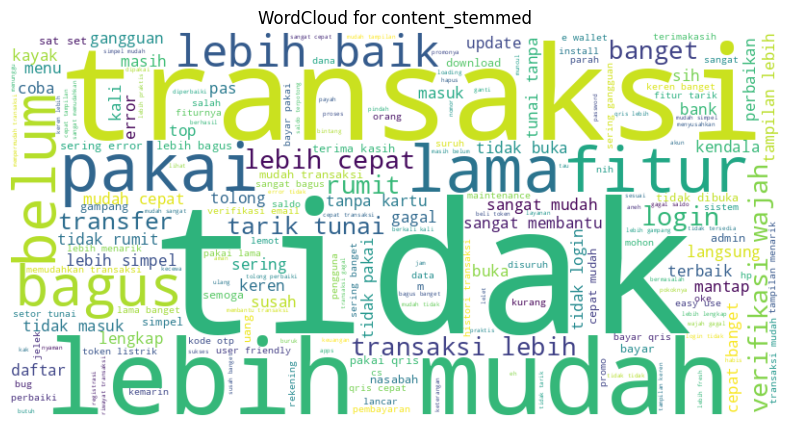

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Gabungkan semua teks dalam kolom `content_stemmed`, hilangkan petik dan daftar kata
all_text = ' '.join(df['content_stopword'].dropna().astype(str))
all_text = all_text.replace("['", "").replace("']", "").replace("', '", " ")

# Buat objek WordCloud

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200,
    normalize_plurals=False
).generate(all_text)


# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for content_stemmed')
plt.show()


**Stemming**

In [ ]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Daftar kata yang tidak boleh di-stem
exception_words = {"perbaikan", "diperbaiki", "tampilan", "layanan","menarik", "gangguan"}  # Tambahkan kata lain sesuai kebutuhan

# Fungsi stemming dengan pengecualian
def stemming_tokens_indonesian(tokens):
    stemmed_tokens = [token if token in exception_words else stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Menerapkan stemming pada kolom content_tokens
df['content_stemmed'] = df['content_tokens'].apply(stemming_tokens_indonesian)

# Menampilkan hasil
df[['content_tokens', 'content_stemmed']]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


,content_tokens,content_stemmed
0,"[lebih, simpel, maksudnya, nasabah, suruh, mig...","[lebih, simpel, maksud, nasabah, suruh, migras..."
1,"[daftar, orang, tua, verifikasi, wajah, gagal,...","[daftar, orang, tua, verifikasi, wajah, gagal,..."
3,"[lebih, simpel]","[lebih, simpel]"
4,"[notifikasi, terkait, konfirmasi, transaksi, l...","[notifikasi, kait, konfirmasi, transaksi, lama..."
5,"[memakai, baras, minimum, transaksi, tidak, me...","[pakai, baras, minimum, transaksi, tidak, paka..."
...,...,...
20615,"[bayar, bayar, pakai, mudah]","[bayar, bayar, pakai, mudah]"
20616,"[tidak, menu, pilihan, histori, transaksi, rek...","[tidak, menu, pilih, histori, transaksi, reken..."
20617,[thanks],[thanks]
20618,"[tidak, verifikasi, wajah, berkali, kali]","[tidak, verifikasi, wajah, kali, kali]"


In [ ]:
df.to_csv('/content/olahdatafix.csv', index=False)
from google.colab import files
files.download('/content/olahdatafix.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>